In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/pbs/home/c/cmurray/cluster_likelihood/')
import modules.simulation as simulation
import pyccl as ccl

In [2]:
# Define custom style
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 10,
    "figure.figsize": (3.543, 2.165),
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 4,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.frameon": False,
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.major.width": 1,
    "ytick.major.width": 1,
    "xtick.minor.width": 0.5,
    "ytick.minor.width": 0.5,
    "savefig.format": "pdf"
})

cm_to_inch = 0.393701

In [3]:
simulator = simulation.UniverseSimulator( None , '/pbs/home/c/cmurray/cluster_likelihood/config/capish.ini')

In [4]:
cosmo_lcdm = ccl.Cosmology( Omega_c = 0.265, 
                       Omega_b = 0.05, 
                       h = 0.7 , 
                       sigma8 = 0.8, 
                       n_s= 0.96)
                       
cosmo_desi = ccl.Cosmology( Omega_c = 0.25, 
                       Omega_b = 0.05, 
                       h = 0.7 , 
                       sigma8 = 0.8, 
                       n_s= 0.96,
                       w0 = -0.5,   # change dark energy equation of state parameter w0
                       wa = -2.,
                       extra_parameters = {"camb": {'dark_energy_model' : 'ppf', }} ) 

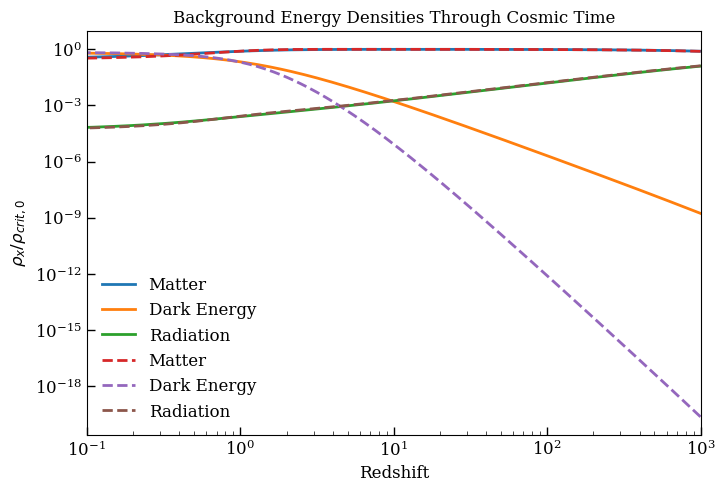

In [5]:
# Compute and plot background energy densities as a function of scale factor

a = np.logspace( -3, 0, 200)  # scale factor from early universe to today

rho_crit = ccl.background.rho_x(  cosmo_lcdm, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_lcdm, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_lcdm, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_lcdm, a, 'radiation') / rho_crit

plt.figure(figsize=(7,5))
plt.plot(1/a-1, rho_m, label='Matter')
plt.plot(1/a-1, rho_de, label='Dark Energy')
plt.plot(1/a-1, rho_rad, label='Radiation')

rho_crit = ccl.background.rho_x(  cosmo_desi, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_desi, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_desi, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_desi, a, 'radiation') / rho_crit

plt.plot(1/a-1, rho_m , '--', label='Matter')
plt.plot(1/a-1, rho_de , '--', label='Dark Energy')
plt.plot(1/a-1, rho_rad , '--', label='Radiation')

plt.xlabel('Redshift')
plt.ylabel(r'$\rho_x / \rho_{crit,0}$')
plt.title('Background Energy Densities Through Cosmic Time')
plt.legend()
plt.tight_layout()
plt.xlim( 0.1 , 1000 )
plt.xscale('log')
plt.yscale('log')

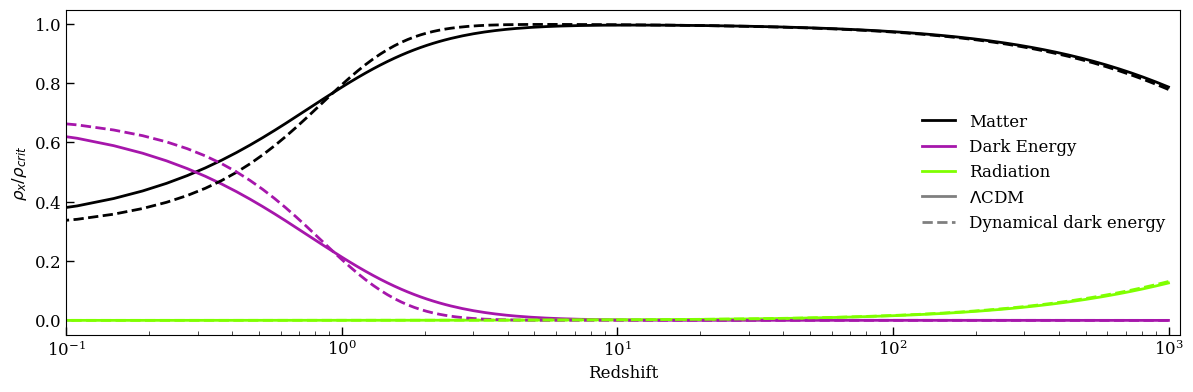

In [6]:
a = np.logspace( -3, 0, 200)  # scale factor from early universe to today

rho_crit = ccl.background.rho_x(  cosmo_lcdm, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_lcdm, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_lcdm, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_lcdm, a, 'radiation') / rho_crit

plt.figure(figsize=(12,4))
plt.plot(1/a-1, rho_m , 'k', label='Matter')
plt.plot(1/a-1, rho_de , c='#a616ab', label='Dark Energy')
plt.plot(1/a-1, rho_rad, c ='chartreuse' , label='Radiation')

rho_crit = ccl.background.rho_x(  cosmo_desi, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_desi, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_desi, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_desi, a, 'radiation') / rho_crit

plt.plot(1/a-1, rho_m  , '--', c='k')
plt.plot(1/a-1, rho_de  , '--', c='#a616ab')
plt.plot(1/a-1, rho_rad , '--', c ='chartreuse')

plt.xlabel('Redshift')
plt.ylabel(r'$\rho_x / \rho_{crit}$')
# plt.title('Background Energy Densities Through Cosmic Time')
plt.tight_layout()
plt.xlim( 0.1 , 1100 )
plt.xscale('log')
plt.plot( 0 , 0 , 'k', label=r'$\Lambda$CDM' , alpha = 0.5)
plt.plot( 0 , 0 , '--', c='k', label='Dynamical dark energy' , alpha = 0.5)
plt.legend()


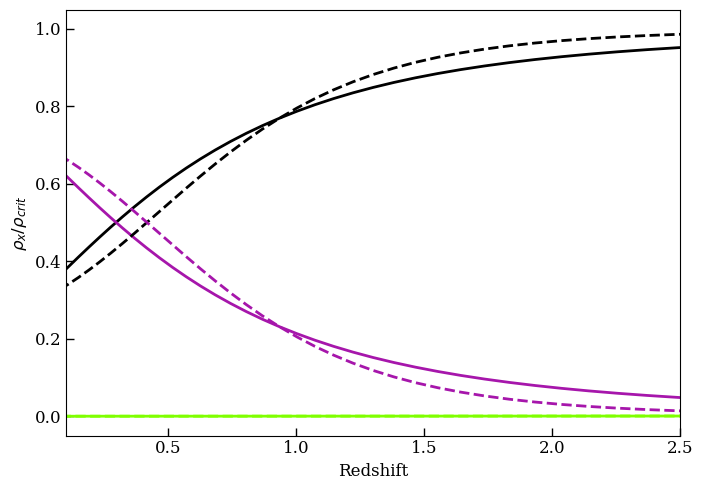

In [7]:
# Compute and plot background energy densities as a function of scale factor

a = np.logspace( -3, 0, 200)  # scale factor from early universe to today

rho_crit = ccl.background.rho_x(  cosmo_lcdm, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_lcdm, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_lcdm, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_lcdm, a, 'radiation') / rho_crit

plt.figure(figsize=(7,5))
plt.plot(1/a-1, rho_m , 'k', label='Matter')
plt.plot(1/a-1, rho_de , c='#a616ab', label='Dark Energy')
plt.plot(1/a-1, rho_rad, c ='chartreuse' , label='Radiation')

rho_crit = ccl.background.rho_x(  cosmo_desi, a, 'critical' )
rho_m = ccl.background.rho_x(cosmo_desi, a, 'matter') / rho_crit
rho_de = ccl.background.rho_x(cosmo_desi, a, 'dark_energy') / rho_crit
rho_rad = ccl.background.rho_x(cosmo_desi, a, 'radiation') / rho_crit

plt.plot(1/a-1, rho_m  , '--', c='k')
plt.plot(1/a-1, rho_de  , '--', c='#a616ab')
plt.plot(1/a-1, rho_rad , '--', c ='chartreuse')

plt.xlabel('Redshift')
plt.ylabel(r'$\rho_x / \rho_{crit}$')
# plt.title('Background Energy Densities Through Cosmic Time')
plt.tight_layout()
plt.xlim( 0.1 , 2.5 )
plt.plot( 0 , 0 , 'k', label=r'$\Lambda$CDM' , alpha = 0.5)
plt.plot( 0 , 0 , '--', c='k', label='Dynamical dark energy' , alpha = 0.5)
# plt.legend()

#plt.yscale('log')

In [21]:
def halo_counts( cosmo , log10min = 14.3 , log10max = 15.3 , z_bins = np.linspace(0, 2, 21) ,c = 'k' , linestyle = '-' , use_label = True ):
    """
    Calculate the halo counts in a given mass range at redshift z.
    """
    log10ms , redshifts = simulator.halo_catalogue_class.get_halo_catalogue( cosmo )

    z_counts, _ = np.histogram(redshifts[ ( log10ms > log10min ) & ( log10ms < log10max )], bins=z_bins)

    #plt.step( z_cents , z_counts, where='mid', label=f'{z_bins[i]:.2f} < z < {z_bins[i+1]:.2f}')
    if use_label == True:
        label = f'{log10min:.1f} < log$_{{10}}$ (M/$M_{{\\odot}}$) < {log10max:.1f}'
    else:
        label = None
    plt.plot( z_cents , z_counts, ls = linestyle, c = c, label=label )
    return

In [22]:
z_bins = np.linspace( 0.1 , 2.5 , 40 )
z_cents = 0.5 * (z_bins[1:] + z_bins[:-1])

In [23]:
z_bins

array([0.1       , 0.16153846, 0.22307692, 0.28461538, 0.34615385,
       0.40769231, 0.46923077, 0.53076923, 0.59230769, 0.65384615,
       0.71538462, 0.77692308, 0.83846154, 0.9       , 0.96153846,
       1.02307692, 1.08461538, 1.14615385, 1.20769231, 1.26923077,
       1.33076923, 1.39230769, 1.45384615, 1.51538462, 1.57692308,
       1.63846154, 1.7       , 1.76153846, 1.82307692, 1.88461538,
       1.94615385, 2.00769231, 2.06923077, 2.13076923, 2.19230769,
       2.25384615, 2.31538462, 2.37692308, 2.43846154, 2.5       ])

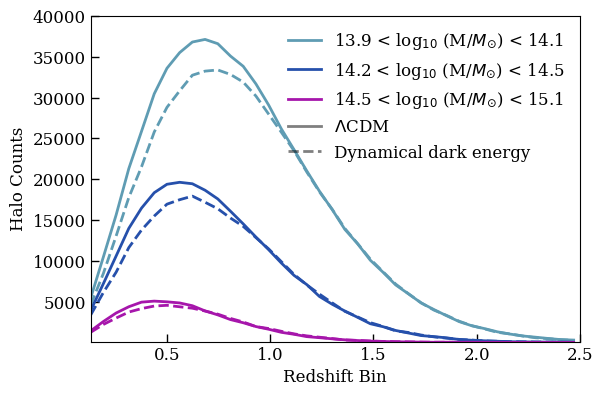

In [24]:
plt.figure(figsize=(6, 4))

halo_counts( cosmo_lcdm , z_bins = z_bins , log10min = 13.95 , log10max = 14.1 , c = '#5f9cb3')
halo_counts( cosmo_desi , z_bins = z_bins , log10min = 13.95 , log10max = 14.1 , c = '#5f9cb3', linestyle='--' , use_label=False)

halo_counts( cosmo_lcdm , z_bins = z_bins , log10min = 14.2 , log10max = 14.5 , c= '#2650ab')
halo_counts( cosmo_desi , z_bins = z_bins , log10min = 14.2 , log10max = 14.5 , c= '#2650ab' , linestyle='--' , use_label=False)

halo_counts( cosmo_lcdm , z_bins = z_bins , log10min = 14.5 , log10max = 15.1 , c = '#a616ab')
halo_counts( cosmo_desi , z_bins = z_bins , log10min = 14.5 , log10max = 15.1 , c = '#a616ab' , linestyle='--' , use_label=False)

plt.xlabel('Redshift Bin')
plt.ylabel('Halo Counts')
plt.tight_layout()
#plt.yscale('log')
plt.ylim( 1e2  , 4e4 )
plt.xlim( 0.13 , 2.5)
plt.plot( 0 , 0 , 'k', label=r'$\Lambda$CDM' , alpha = 0.5)
plt.plot( 0 , 0 , '--', c='k', label='Dynamical dark energy' , alpha = 0.5)
plt.legend()

In [ ]:
def richness_mass_relation( mu , z , parameter_set  ):
    log10Mmin = parameter_set['log10Mmin']
    B = parameter_set['B']
    alpha_l = parameter_set['alpha_l']
    beta_l = parameter_set['beta_l']
    z_p = parameter_set['z_p']

    Mmin = 10**log10Mmin
    M1 = 10**( B ) * Mmin
    M = ( np.exp( mu ) * 1e14 )
    mean_l = ( ( M - Mmin ) / ( M1 -  Mmin ) )**alpha_l * ( ( 1 + z ) / ( 1 + z_p ) )**beta_l

    mean_l[ np.logical_or( mean_l < 0, np.isnan(mean_l) ) ] = 0

    return np.log( np.random.poisson( lam = mean_l ) + 1 )

def mass_observable_relation(  mu, z, parameter_set ):
        
        sigma_l = parameter_set['sigma_l']
        r = parameter_set['r']
        sigma_mwl = parameter_set['sigma_mwl']  

        mean_l = richness_mass_relation( mu , z , parameter_set )
        mean_mwl = mu

        cov = [ [ sigma_l**2 , r * sigma_l * sigma_mwl], 
                [r * sigma_l * sigma_mwl, sigma_mwl**2] ]

        total_noise = np.random.multivariate_normal([0, 0], cov=cov, size=len(mean_l))

        # Apply intrinsic noise to mean values
        ln_richness = mean_l + total_noise.T[0]
        lnM_wl = mean_mwl + total_noise.T[1]

        return np.exp( ln_richness ), np.log10( np.exp( lnM_wl ) ), z


In [ ]:
cluster_catalogue_settings = {
    'log10Mmin': 11.13,
    'B': np.log10( 10**12.37 / 10**11.13 ),
    'alpha_l': 0.748 - np.log10(0.744),
    'beta_l': 0.0,
    'sigma_l': 0.3,
    'sigma_mwl': 0.2,
    'r': 0.0,
    'z_p': 0.5
}

In [ ]:
mass_observable_relation( np.array( [ np.log( 5e14 / 1e14 ), np.log( 5e14 / 1e14 ) , np.log( 5e14 / 1e14 ) ]) , 
                          np.array( [ 0.5 , 0.5 , 0.5 ] ) , cluster_catalogue_settings )

(array([ 91.48081589, 168.05387286, 112.60309641]),
 array([0.6383972 , 0.72687144, 0.71370615]),
 array([0.5, 0.5, 0.5]))

In [ ]:
log10ms_desi , redshifts_desi = simulator.halo_catalogue_class.get_halo_catalogue( cosmo_desi )

In [ ]:
log10ms_lcdm , redshifts_lcdm = simulator.halo_catalogue_class.get_halo_catalogue( cosmo_lcdm )

In [ ]:
richness_desi, mass_wl_desi , z_desi = mass_observable_relation( np.log( 10**log10ms_desi / 1e14 ),
                                                                redshifts_desi,
                                                                cluster_catalogue_settings )

In [ ]:
richness_lcdm, mass_wl_lcdm, z_lcdm = mass_observable_relation( np.log( 10**log10ms_lcdm / 1e14 ),
                                                    redshifts_lcdm,
                                                    cluster_catalogue_settings )

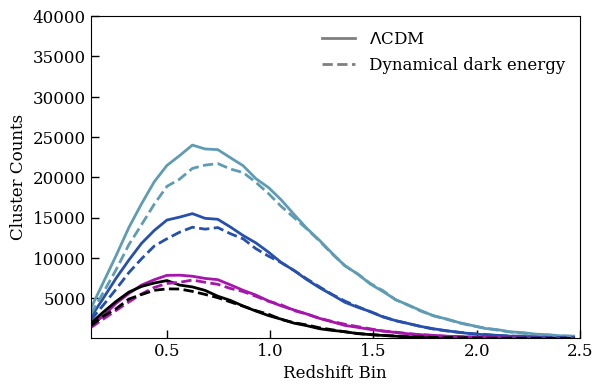

In [ ]:
plt.figure(figsize=(6, 4))

# Define richness bins (logarithmic bins for better scaling)
richness_bins = [ 35 , 45 , 60 , 80 , np.inf]
richness_labels = [r'$35 < \lambda < 45$', r'$45 < \lambda < 60$', r'$60 < \lambda < 80$' , r'$80 < \lambda < 100$' , r'$\lambda > 100$']
colors = ['#5f9cb3', '#2650ab', '#a616ab' , 'k' , 'b']

# LCDM
for i in range(len(richness_bins)-1):
    mask = (richness_lcdm > richness_bins[i]) & (richness_lcdm <= richness_bins[i+1])
    counts, _ = np.histogram(z_lcdm[mask], bins=z_bins)
    plt.plot(z_cents, counts, color=colors[i] )#, label=richness_labels[i])

# DESI
for i in range(len(richness_bins)-1):
    mask = (richness_desi > richness_bins[i]) & (richness_desi <= richness_bins[i+1])
    counts, _ = np.histogram(z_desi[mask], bins=z_bins)
    plt.plot(z_cents, counts, color=colors[i], linestyle='--')

plt.xlabel('Redshift Bin')
plt.ylabel('Cluster Counts')
plt.tight_layout()
#plt.yscale('log')
plt.ylim( 1e2  , 4e4 )
plt.xlim( 0.13 , 2.5)
plt.plot( 0 , 0 , 'k', label=r'$\Lambda$CDM' , alpha = 0.5)
plt.plot( 0 , 0 , '--', c='k', label='Dynamical dark energy' , alpha = 0.5)
plt.legend()